In [1]:
import numpy as np
import cv2
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

import json
plt.style.use('seaborn-dark')

In [2]:
from dataset import TigerDataset
dataset = TigerDataset.from_config({'img_dir': '/home/arseny/datasets/atrw/val',
                                   'labels_path': '/home/arseny/datasets/atrw/keypoint_val.json',
                                    'size': 256,
                                    'crop': 'random',
                                    'corrupt': None,                                    
                                   })

preparing data: 100%|██████████| 8/8 [00:00<00:00, 332.40it/s]
I0730 11:24:28.425055 5180 dataset.py:111] Dataset has been created with 8 samples


In [3]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (15, 10)

In [4]:
idx = -1

(array([[ 0., -0.],
        [ 0., -0.],
        [ 0., -0.],
        [ 0., -0.],
        [ 0., -0.],
        [ 0., -0.],
        [ 0., -0.],
        [ 0., -0.],
        [ 0., -0.],
        [ 0., -0.],
        [ 0., -0.],
        [ 0., -0.],
        [ 0., -0.],
        [ 0., -0.],
        [ 0., -0.]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32))

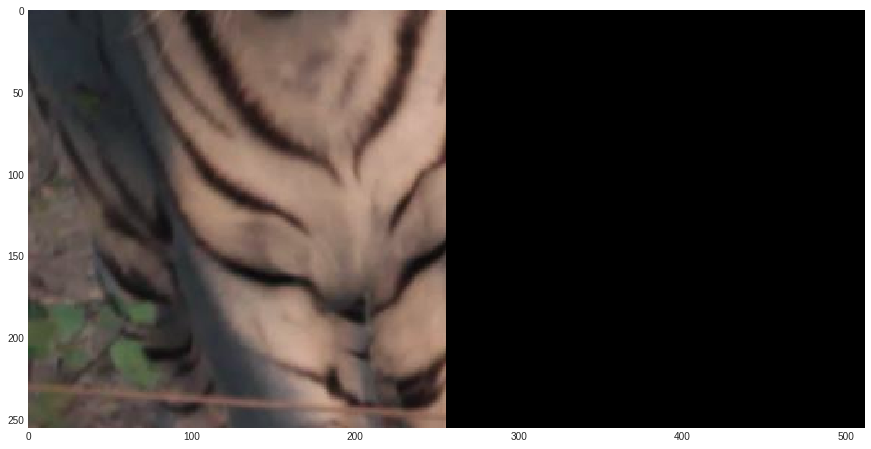

In [12]:
idx += 1
sample = dataset[idx]

img = sample['img'].astype('uint8')
mask = sample['mask']
flags = sample['flags']

# for x, y, z in kpts:
#     print(x, y, z)
#     img = cv2.circle(img, (x, y), 3, color=[255, 255, 0], thickness=-1)

mask = np.transpose(mask, (1, 2, 0))
mask = (mask.sum(axis=2) * 255).astype(img.dtype)
mask = cv2.cvtColor(np.expand_dims(mask, -1), cv2.COLOR_GRAY2RGB)

plt.imshow(np.hstack((img, mask)))

sample['kpts'], flags


In [8]:
img.max()

255.0

In [ ]:
plt.imshow(mask)

In [ ]:
mask.shape